In [1]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import math
from scipy.special import perm, comb
from itertools import permutations, combinations

# 예제: 10명의 선수 중 3명을 뽑아 금, 은, 동메달을 주는 경우의 수 (순열)
n, r = 10, 3
p_manual = math.factorial(n) / math.factorial(n - r)
p_scipy = perm(n, r)
p_iter = permutations(range(n), r)

print(f"Permutation ({n}P{r}): {p_manual}") # 720.0
print(f"Permutation (scipy): {p_scipy}") # 720
print(f"Permutation (iter): {len(list(p_iter))}") # 720

# 예제: 10명의 학생 중 3명의 대표를 뽑는 경우의 수 (조합)
c_manual = math.factorial(n) / (math.factorial(r) * math.factorial(n - r))
c_scipy = comb(n, r)
c_iter = combinations(range(n), r)
print(f"\nCombination ({n}C{r}): {c_manual}") # 120.0
print(f"Combination (scipy): {c_scipy}") # 120
print(f"Combination (iter): {len(list(c_iter))}") # 120

Permutation (10P3): 720.0
Permutation (scipy): 720.0
Permutation (iter): 720

Combination (10C3): 120.0
Combination (scipy): 120.0
Combination (iter): 120


In [2]:
# 사전 확률 (Prior)
p_a = 0.001  # P(A): 실제로 병이 있을 확률
p_not_a = 1 - p_a # P(A'): 실제로 병이 없을 확률

# 가능도 (Likelihood)
p_b_given_a = 0.99 # P(B|A): 병이 있을 때 양성으로 진단할 확률 (민감도)
p_b_given_not_a = 0.02 # P(B|A'): 병이 없을 때 양성으로 진단할 확률 (위양성률)

# 증거 (Evidence) 계산: P(B) = P(B|A)*P(A) + P(B|A')*P(A')
# 전체 양성 판정 확률 = (실제 병이 있으면서 양성일 확률) + (실제 병이 없으면서 양성일 확률)
p_b = (p_b_given_a * p_a) + (p_b_given_not_a * p_not_a)

# 베이즈 정리를 이용한 사후 확률 (Posterior) 계산
# P(A|B) = [P(B|A) * P(A)] / P(B)
p_a_given_b = (p_b_given_a * p_a) / p_b

print(f"P(A) = {p_a:.3f} (사전 확률)")
print(f"P(B) = {p_b:.5f} (전체 양성 판정 확률)")
print(f"P(A|B) = {p_a_given_b:.3f} (사후 확률)")

P(A) = 0.001 (사전 확률)
P(B) = 0.02097 (전체 양성 판정 확률)
P(A|B) = 0.047 (사후 확률)


불량품이 정확히 2개 나올 확률: 0.1887


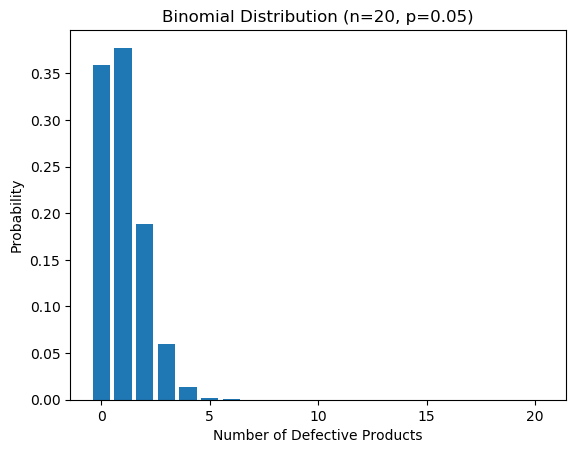

In [3]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np

n, p = 20, 0.05
k = 2

# P(X=k) - pmf 사용
prob = binom.pmf(k, n, p)
print(f"불량품이 정확히 {k}개 나올 확률: {prob:.4f}") # 0.1887

# 시각화
x = np.arange(0, n+1)
plt.bar(x, binom.pmf(x, n, p))
plt.title(f"Binomial Distribution (n={n}, p={p})")
plt.xlabel("Number of Defective Products")
plt.ylabel("Probability")
plt.show()

손님이 정확히 5명 올 확률: 0.0378


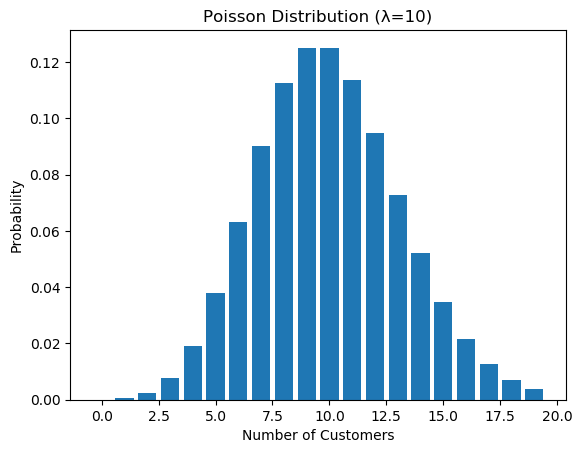

In [4]:
from scipy.stats import poisson

mu = 10 # lambda
k = 5

# P(X=k) - pmf 사용
prob = poisson.pmf(k, mu)
print(f"손님이 정확히 {k}명 올 확률: {prob:.4f}") # 0.0378

# 시각화
x = np.arange(0, 2 * mu)
plt.bar(x, poisson.pmf(x, mu))
plt.title(f"Poisson Distribution (λ={mu})")
plt.xlabel("Number of Customers")
plt.ylabel("Probability")
plt.show()

점수가 80점 이상 90점 이하일 확률: 0.1359


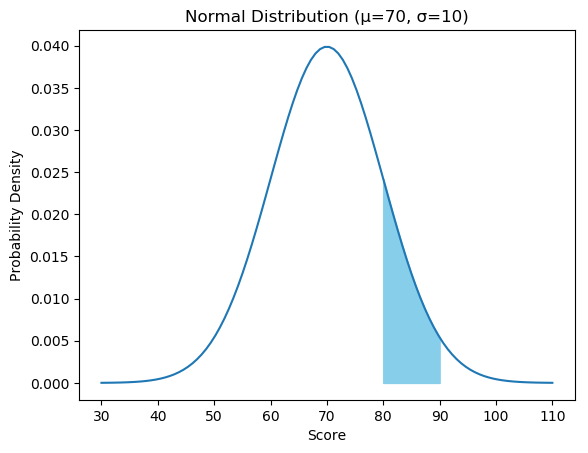

In [5]:
from scipy.stats import norm

mu, sigma = 70, 10

# P(80 <= X <= 90) = P(X <= 90) - P(X < 80)
# cdf(x)는 P(X <= x)를 계산
prob = norm.cdf(90, loc=mu, scale=sigma) - norm.cdf(80, loc=mu, scale=sigma)
print(f"점수가 80점 이상 90점 이하일 확률: {prob:.4f}") # 0.1359

# 시각화
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x, norm.pdf(x, loc=mu, scale=sigma))
plt.title(f"Normal Distribution (μ={mu}, σ={sigma})")
plt.xlabel("Score")
plt.ylabel("Probability Density")
# 확률 영역 채우기
x_fill = np.linspace(80, 90, 100)
plt.fill_between(x_fill, norm.pdf(x_fill, loc=mu, scale=sigma), color='skyblue')
plt.show()

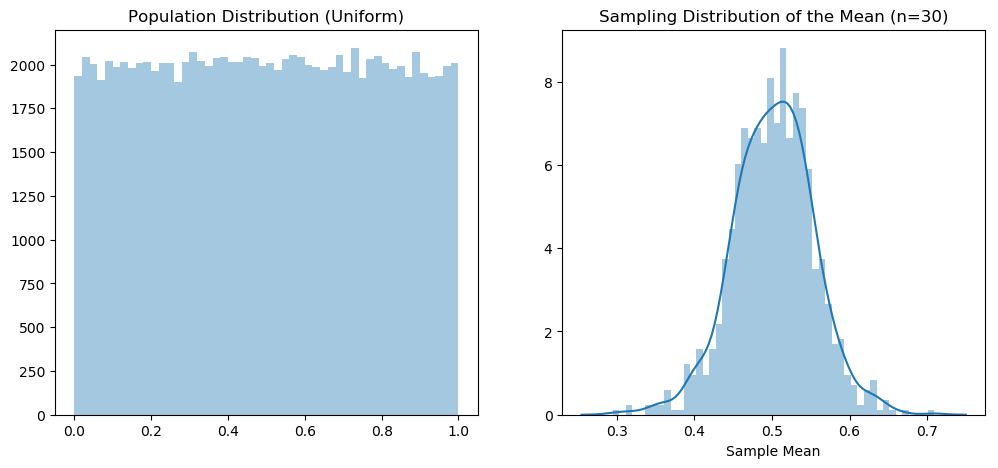

-0.12218619443030276
0.7802157530837959


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 모집단 생성: 0과 1 사이의 균등 분포 (정규분포가 아님)
population = np.random.uniform(0, 1, 100000)

# 표본 크기(n)와 시뮬레이션 횟수 설정
sample_size = 30
num_simulations = 1000

# 표본 평균들을 저장할 리스트
sample_means = []

for _ in range(num_simulations):
    # 모집단에서 표본 추출
    sample = np.random.choice(population, size=sample_size)
    # 표본의 평균 계산 및 저장
    sample_means.append(sample.mean())

# 시각화
plt.figure(figsize=(12, 5))

# 모집단 분포
plt.subplot(1, 2, 1)
sns.distplot(population, bins=50, kde=False)
plt.title('Population Distribution (Uniform)')

# 표본 평균들의 분포
plt.subplot(1, 2, 2)
sns.distplot(sample_means, bins=50, kde=True)
plt.title(f'Sampling Distribution of the Mean (n={sample_size})')
plt.xlabel('Sample Mean')

plt.show()

# 왜도 및 첨도 통계량 확인 방법
from scipy import stats
# 왜도: 평균을 중심으로 좌우로 데이터가 편향되어 있는 정도
# 0보다 크면(양수) 오른쪽으로 긴 꼬리 / 0보다 작으면(음수) 왼쪽으로 긴 꼬리
print(stats.skew(sample_means))     # 0.10185051041351989
# 첨도: 뾰족함 정도
# 0은 정규분포 기준 / 0보다 크면 중앙 집중도가 정규분포보다 큼 / 0보다 작으면 중앙 집중도가 정규분포보다 작음
print(stats.kurtosis(sample_means)) # -0.19022850947512282

In [7]:
from scipy.stats import sem
import numpy as np

# 예제 데이터 (어떤 표본)
sample_data = [10, 12, 15, 13, 18, 11, 16, 14]

# 1. 수동 계산
n = len(sample_data)
sample_std = np.std(sample_data, ddof=1) # ddof=1은 표본 표준편차를 의미
standard_error_manual = sample_std / np.sqrt(n)

# 2. scipy.stats.sem 사용
standard_error_scipy = sem(sample_data)

print(f"표본 크기 (n): {n}")                                    # 8
print(f"표본 표준편차 (s): {sample_std:.4f}")                   # 2.6693
print(f"표준 오차 (수동 계산): {standard_error_manual:.4f}")    # 0.9437
print(f"표준 오차 (scipy.sem): {standard_error_scipy:.4f}")     # 0.9437

표본 크기 (n): 8
표본 표준편차 (s): 2.6693
표준 오차 (수동 계산): 0.9437
표준 오차 (scipy.sem): 0.9437


In [8]:
import pandas as pd
import numpy as np
from scipy.stats.mstats import gmean

# 주가 데이터 예시
data = {'price': [100, 110, 105, 120, 90]}
df = pd.DataFrame(data)

In [9]:
# 각 기간의 성장률이 아닌, '비율'을 계산 (1 + 성장률)
df['growth_ratio'] = df['price'] / df['price'].shift(1)
print("--- Growth Ratios ---")
print(df)

--- Growth Ratios ---
   price  growth_ratio
0    100           NaN
1    110      1.100000
2    105      0.954545
3    120      1.142857
4     90      0.750000


In [10]:
# 결측치(첫 행)를 제외하고 기하 평균 계산
valid_ratios = df['growth_ratio'].dropna()

# 1-1. Scipy 사용
geo_mean_ratio_scipy = gmean(valid_ratios)
avg_growth_rate_scipy = geo_mean_ratio_scipy - 1
print(f"\nAverage Growth Rate (Scipy): {avg_growth_rate_scipy:.4%}") # -2.5996%

# 1-2. 수동 계산
# (1.1 * 0.9545 * 1.1428 * 0.75)^(1/4) - 1
geo_mean_ratio_manual = np.prod(valid_ratios)**(1/len(valid_ratios))
avg_growth_rate_manual = geo_mean_ratio_manual - 1
print(f"Average Growth Rate (Manual): {avg_growth_rate_manual:.4%}") # -2.5996%

# 최종 값 확인: 100 * (1 - 0.026) * (1 - 0.026) * (1 - 0.026) * (1 - 0.026) ~= 90
final_value_check = df['price'].iloc[0] * (1 + avg_growth_rate_manual)**len(valid_ratios)
print(f"Final value check: {final_value_check:.2f} (실제 최종값: {df['price'].iloc[-1]}) ")


Average Growth Rate (Scipy): -2.5996%
Average Growth Rate (Manual): -2.5996%
Final value check: 90.00 (실제 최종값: 90) 


In [11]:
# ln(P_t / P_{t-1}) = ln(P_t) - ln(P_{t-1})
df['log_return'] = np.log(df['price']) - np.log(df['price'].shift(1))
# 또는 df['log_return'] = np.log(df['price'] / df['price'].shift(1))

# 2-2. 일반 산술 변화율 계산 (비교용)
df['arithmetic_return'] = df['price'].pct_change()

print("\n--- Log Return vs Arithmetic Return ---")
print(df[['price', 'arithmetic_return', 'log_return']])
'''
--- Log Return vs Arithmetic Return ---
   price  arithmetic_return  log_return
0    100                NaN         NaN
1    110           0.100000    0.095310
2    105          -0.045455   -0.046520
3    120           0.142857    0.133531
4     90          -0.250000   -0.287682
'''

# 2-3. 시간 가산성 확인
total_log_return = df['log_return'].sum()
total_period_return_from_log = np.exp(total_log_return) - 1
actual_total_return = (df['price'].iloc[-1] / df['price'].iloc[0]) - 1

print(f"\nTotal Log Return: {total_log_return:.4f}") # -0.1054
print(f"Total return calculated from sum of log returns: {total_period_return_from_log:.2%}") # -10.00%
print(f"Actual total return over the period: {actual_total_return:.2%}") # -10.00%


--- Log Return vs Arithmetic Return ---
   price  arithmetic_return  log_return
0    100                NaN         NaN
1    110           0.100000    0.095310
2    105          -0.045455   -0.046520
3    120           0.142857    0.133531
4     90          -0.250000   -0.287682

Total Log Return: -0.1054
Total return calculated from sum of log returns: -10.00%
Actual total return over the period: -10.00%
